## Load libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

from spacy.matcher import Matcher
from google.colab import drive

## Load data

In [118]:
%%time

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the .feather file
# file_path = "/content/drive/MyDrive/diagnose_en_dataset.feather"
file_path = "/content/drive/MyDrive/diagnose_en_dataset-patient_info-With_Gender_and_Reference.feather"

# file_path = "/content/drive/MyDrive/"

# Load the .feather file as a Pandas DataFrame
df = pd.read_feather(file_path)

# Print the DataFrame
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CPU times: user 678 ms, sys: 866 ms, total: 1.54 s
Wall time: 5.35 s


,id,Description,Doctor,Patient,Self,Gender
0,0,Q. What does abutment of the nerve root mean?,Hi. I have gone through your query with diligence and would like you to know that I am here to help you. For further information consult a neurologist online --> https://www.icliniq.com/ask-a-doctor-online/neurologist,"Hi doctor,I am just wondering what is abutting and abutment of the nerve root means in a back issue. Please explain. What treatment is required for annular bulging and tear?",1,X
1,1,"Q. Every time I eat spicy food, I poop blood. Why?","Hello. I have gone through your information and test reports (attachment removed to protect patient identity). So, in view of that, there are a couple of things that I can opine upon: Hope that helps. For more information consult a general surgeon online --> https://icliniq.com./ask-a-doctor-online/general-surgeon","Hi doctor, I am a 26 year old male. I am 5 feet and 9 inches tall and weigh 255 pounds. When I eat spicy food, I poop blood. Sometimes when I have constipation as well, I poop a little bit of blood. I am really scared that I have colon cancer. I do have diarrhea often. I do not have a family history of colon cancer. I got blood tests done last night. Please find my reports attached.",1,M
2,2,Q. Will Nano-Leo give permanent solution for erection problem?,Hi. For further doubts consult a sexologist online --> https://www.icliniq.com/ask-a-doctor-online/sexologist,"Hello doctor, I am 48 years old. I am experiencing weak erection and difficulty in sustaining the same. This condition was observed 10 years back. Also, there is premature ejaculation. Other physical ailments that I have are, I am suffering from hypertension and taking Amlopres-L (Amlodipine and Lisinopril) for the last 10 years, high cholesterol and triglycerides. My cholesterol level is 225 and triglyceride is 200 for the last 12 years. I used to do frequent masturbation in early age. I do have erection during morning hours many times, particularly after sound sleep or if I had long walk previous day. I am having Sildenafil 25 mg or 5 mg Cialis, which is effective enough. But, I wish to get rid of tablet support and live natural way. I consulted urologist today and he prescribed me Nano-Leo capsules and Modula 5 mg for 10 days. I wish to have your second opinion on this. Please guide.",1,M
3,3,Q. Will Kalarchikai cure multiple ovarian cysts in PCOD?,"Hello. I just read your query. See Kalarachi Kai choornam is helpful in amenorrhea. As far as small cysts are concerned they are unmatured eggs which failed to induce menstrual cycle previously, as a result, they got collected in the ovary and they will remain in the ovary. Now, you have got your periods you can start trying for conception. But I advise you to do it under the supervision of a nearby gynecologist because egg size is important while conception and that you can know by ovulation study. Ovulation study is performed under the supervision of a gynecologist. For gall stones, surgical intervention is required generally. Medicine is not of much help.","Hello doctor, I have multiple small cysts in both ovaries (PCOS). Our family friend suggested me to consume Kalarchikai medicine, powdered mixed with pepper and honey to have it for one mandalam (48 days). I have completed nearly 44 days by consuming one small ball of the mixture every morning and before two weeks I got my periods. Then I had checked whether the cysts were dissolved by having an abdomen scan. But still, small multiple follicules have been seen in it with both ovaries enlarged. Kindly suggest me what I can do further. I got married before one and a half years and I am much worried about my pregnancy. I have gallstones as well.",1,F
4,4,Q. I masturbate only by rubbing the tip of the penis. Is it a wrong way?,Hi. For further doubts consult a sexologist online -->https://www.icliniq.com/ask-a-doctor-online/sexologist,"Hi doctor, During masturbation I just rub the tip of the penis and not the entire pen

In [60]:
# Load the pre-trained SpaCy model
nlp = spacy.load('en_core_web_sm')

# Define gender-biased keywords for female and male patients
# NOTE: most of these keywords are generated using ChatGPT

# FEMALE
female_gender_bias_keywords = [
    # Newly added by Umesh ===>
    "overreact",
    "irrational",
    "PMS",
    "nagging",
    "emotion",
    "emotions",
    # <===

    "sensitive",
    "emotional",
    # "strong",
    "dominant",
    "nurturing",
    "caretaker",
    "assertive",
    "ambitious",
    "submissive",
    "passive",
    "gentle",
    "soft-spoken",
    "aggressive",
    "independent",
    "confident",
    "competitive",
    "stoic",
    "beautiful",
    "pretty",
    "attractive",
    # "handsome",
    # "rugged",
    # "muscular",
    "maternal",
    # "paternal",
    "hysterical",
    "dramatic",
    # "stoic",
    "unemotional",
    # "smart",
    # "intelligent",
    "incompetent",
    "incapable",
    "bossy",
    "commanding",
    "authoritative",
    # "arts",
    "skinny",
    "slim"
    # "strong",
    # "muscular"
]

# MALE


# Define words with negation and disagreement
disagreement_keywords = [
    'not',
    'no',
    'never',
    'neither',
    'nor',
    'none',
    'nobody',
    'nowhere',
    'nothing',
    'nonexistent',
    'lack',
    'without',
    'absence',
    'deny',
    'refuse',
    'won\'t',
    'isn\'t',
    'can\'t',
    'don\'t',
    'doesn\'t',
    'shouldn\'t',
    'couldn\'t',
    'wouldn\'t',
    'hasn\'t',
    'haven\'t'
]

## Function defintions:
1. `gender_bias_freq`: check the frequency of predefined gender-biased words in the input text
1. `disagreement_freq`: the length of the doctor's response (in words) and the frequency of words showing disagreement or a negative response

In [46]:
def gender_bias_freq(text):
    doc = nlp(text)

    # Calculate the frequency of female gender-biased keywords in doctor's response
    female_freq = sum(1 for token in doc if token.text.lower() in female_gender_bias_keywords)

    return female_freq


In [106]:
def disagreement_freq(text):
    doc = nlp(text)

    # Get the word count:
    text_len = len(nlp(doc))

    # Calculate the frequency of disagreement keywords in doctor's response
    disagree_freq = sum(1 for token in doc if token.text.lower() in disagreement_keywords)

    return text_len, disagree_freq


## Select the dataset

In [124]:
# n_sample = 10
# df_small = df.sample(n = n_sample)

df_small = df

df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257469 entries, 0 to 257468
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           257469 non-null  int64 
 1   Description  257469 non-null  object
 2   Doctor       257469 non-null  object
 3   Patient      257469 non-null  object
 4   Self         257469 non-null  int64 
 5   Gender       257469 non-null  object
dtypes: int64(2), object(4)
memory usage: 11.8+ MB


## Apply functions: *`gender_bias_freq`* and *`disagreement_freq`*

In [125]:
%%time

# Check biased response
df_small['Gend_bias_freq'] = df_small['Doctor'].apply(gender_bias_freq)

# Check the length of doctor's response (in no. of words) and frequency of disagreement keywords
df_small[['Response_len','Disagree_freq']] = df_small['Doctor'].apply(lambda x: pd.Series(disagreement_freq(x)))

CPU times: user 5h 27min 49s, sys: 49 s, total: 5h 28min 38s
Wall time: 5h 31min 42s


In [142]:
df_small.head()

,id,Description,Doctor,Patient,Self,Gender,Gend_bias_freq,Response_len,Disagree_freq
0,0,Q. What does abutment of the nerve root mean?,Hi. I have gone through your query with diligence and would like you to know that I am here to help you. For further information consult a neurologist online --> https://www.icliniq.com/ask-a-doctor-online/neurologist,"Hi doctor,I am just wondering what is abutting and abutment of the nerve root means in a back issue. Please explain. What treatment is required for annular bulging and tear?",1,X,0,35,0
1,1,"Q. Every time I eat spicy food, I poop blood. Why?","Hello. I have gone through your information and test reports (attachment removed to protect patient identity). So, in view of that, there are a couple of things that I can opine upon: Hope that helps. For more information consult a general surgeon online --> https://icliniq.com./ask-a-doctor-online/general-surgeon","Hi doctor, I am a 26 year old male. I am 5 feet and 9 inches tall and weigh 255 pounds. When I eat spicy food, I poop blood. Sometimes when I have constipation as well, I poop a little bit of blood. I am really scared that I have colon cancer. I do have diarrhea often. I do not have a family history of colon cancer. I got blood tests done last night. Please find my reports attached.",1,M,0,65,0
2,2,Q. Will Nano-Leo give permanent solution for erection problem?,Hi. For further doubts consult a sexologist online --> https://www.icliniq.com/ask-a-doctor-online/sexologist,"Hello doctor, I am 48 years old. I am experiencing weak erection and difficulty in sustaining the same. This condition was observed 10 years back. Also, there is premature ejaculation. Other physical ailments that I have are, I am suffering from hypertension and taking Amlopres-L (Amlodipine and Lisinopril) for the last 10 years, high cholesterol and triglycerides. My cholesterol level is 225 and triglyceride is 200 for the last 12 years. I used to do frequent masturbation in early age. I do have erection during morning hours many times, particularly after sound sleep or if I had long walk previous day. I am having Sildenafil 25 mg or 5 mg Cialis, which is effective enough. But, I wish to get rid of tablet support and live natural way. I consulted urologist today and he prescribed me Nano-Leo capsules and Modula 5 mg for 10 days. I wish to have your second opinion on this. Please guide.",1,M,0,13,0
3,3,Q. Will Kalarchikai cure multiple ovarian cysts in PCOD?,"Hello. I just read your query. See Kalarachi Kai choornam is helpful in amenorrhea. As far as small cysts are concerned they are unmatured eggs which failed to induce menstrual cycle previously, as a result, they got collected in the ovary and they will remain in the ovary. Now, you have got your periods you can start trying for conception. But I advise you to do it under the supervision of a nearby gynecologist because egg size is important while conception and that you can know by ovulation study. Ovulation study is performed under the supervision of a gynecologist. For gall stones, surgical intervention is required generally. Medicine is not of much help.","Hello doctor, I have multiple small cysts in both ovaries (PCOS). Our family friend suggested me to consume Kalarchikai medicine, powdered mixed with pepper and honey to have it for one mandalam (48 days). I have completed nearly 44 days by consuming one small ball of the mixture every morning and before two weeks I got my periods. Then I had checked whether the cysts were dissolved by having an abdomen scan. But still, small multiple follicules have been seen in it with both ovaries enlarged. Kindly suggest me what I can do further. I got married before one and a half years and I am much worried about my pregnancy. I have gallstones as well.",1,F,0,127,1
4,4,Q. I masturbate only by rubbing the tip of the penis. Is it a wrong way?,Hi. For further doubts consult a sexologist online -->https://www.icliniq.com/ask-a-doctor-online/sexologist,"Hi doctor, Dur

In [140]:
# df_small[(df_small['Gend_bias_freq'].astype(int) > 0) | (df_small['Disagree_freq'].astype(int) > 0)].head()

## Calculate means of gender-bias proxies

In [128]:
df_small.groupby('Gender')['Disagree_freq'].mean()

Gender
F    0.993338
M    0.871331
X    0.805189
Name: Disagree_freq, dtype: float64

In [129]:
df_small.groupby('Gender')['Response_len'].mean()

Gender
F    110.237165
M     98.437909
X    104.086252
Name: Response_len, dtype: float64

In [130]:
df_small.groupby('Gender')['Gend_bias_freq'].mean()

Gender
F    0.026179
M    0.024632
X    0.023051
Name: Gend_bias_freq, dtype: float64

## Plot means of gender-bias proxies

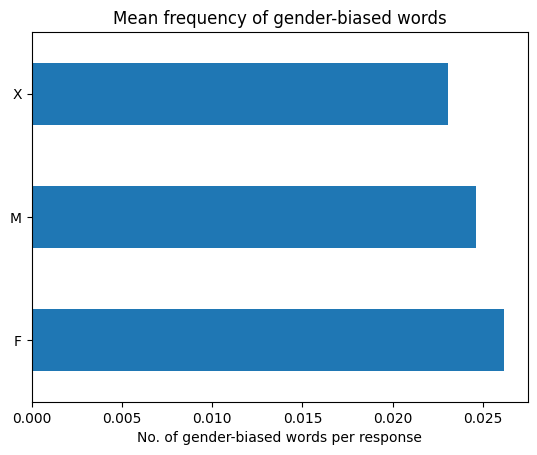

In [135]:
# Calculate the mean frequency of gender-biased words by genders
mean_gender_bias_words = df_small.groupby('Gender')['Gend_bias_freq'].mean()

# Create a bar plot
mean_gender_bias_words.plot(kind='barh')

# Set the labels and title
plt.ylabel('')
plt.xlabel('No. of gender-biased words per response')
plt.title('Mean frequency of gender-biased words')

# Display the plot
plt.show()

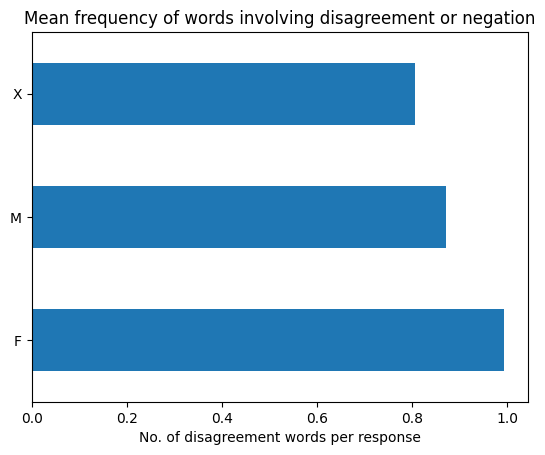

In [137]:
# Calculate the mean frequency of disagreement words
mean_disagreement = df_small.groupby('Gender')['Disagree_freq'].mean()

# Create a bar plot
mean_disagreement.plot(kind='barh')

# Set the labels and title
plt.ylabel('')
plt.xlabel('No. of disagreement words per response')
plt.title('Mean frequency of words involving disagreement or negation')

# Display the plot
plt.show()

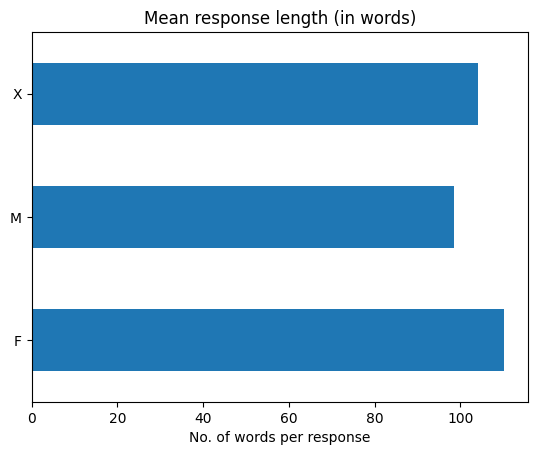

In [139]:
# Calculate the mean response length
mean_response_len = df_small.groupby('Gender')['Response_len'].mean()

# Create a bar plot
mean_response_len.plot(kind='barh')

# Set the labels and title
plt.ylabel('')
plt.xlabel('No. of words per response')
plt.title('Mean response length (in words)')

# Display the plot
plt.show()

## Save the data frame as a .feather file

In [126]:
# # Specify the path to save the .feather file
output_path = "/content/drive/MyDrive/diagnose_en_dataset-patient_info-With_Gender_and_Reference-response_Bias_measures.feather"

# # Save the DataFrame as a .feather file
df.to_feather(output_path)